In [1]:
import pandas as pd
import numpy as np

In [6]:
mush = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Decision Tree\mushroomsDT.csv')

In [7]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
mush.class = mush.class.replace({'e':0, 'p': 1})

SyntaxError: invalid syntax (3240068017.py, line 1)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
mush[mush.select_dtypes(include= ['object']).columns] = mush[mush.select_dtypes(include= ['object']).columns].apply(le.fit_transform)

In [16]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [19]:
mush_train, mush_test = train_test_split(mush, test_size=.2)

In [20]:
mush_train_x = mush_train.iloc[:, 1::]
mush_train_y = mush_train.iloc[:, 0]

mush_test_x = mush_test.iloc[:, 1::]
mush_test_y = mush_test.iloc[:, 0]

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(mush_train_x, mush_train_y)

DecisionTreeClassifier()

In [23]:
pred = dt.predict(mush_test_x)

In [25]:
tab = confusion_matrix(mush_test_y, pred)
tab

array([[854,   0],
       [  0, 771]], dtype=int64)

In [31]:
Accuracy = accuracy_score(mush_test_y, pred)*100
Precision = precision_score(mush_test_y, pred)*100
Recall = recall_score(mush_test_y, pred)*100
F1_score = f1_score(mush_test_y, pred)*100
FPR = tab[0][1]*100/tab.sum(0)[0]

In [32]:
print('Accuracy score is --> ', Accuracy)
print('Precision score is --> ', Precision)
print('Recall score is --> ', Recall)
print('FPR score is --> ', FPR)
print('F1_score score is --> ', F1_score)

Accuracy score is -->  100.0
Precision score is -->  100.0
Recall score is -->  100.0
FPR score is -->  0.0
F1_score score is -->  100.0


In [33]:
dt = DecisionTreeClassifier(criterion= 'entropy')

In [34]:
dt.fit(mush_train_x, mush_train_y)

DecisionTreeClassifier(criterion='entropy')

In [35]:
pred = dt.predict(mush_test_x)

In [36]:
tab = confusion_matrix(mush_test_y, pred)
tab

array([[854,   0],
       [  0, 771]], dtype=int64)

In [37]:
feature_imp = pd.DataFrame({'Feature': mush_train_x.columns, 'Importance': dt.feature_importances_})
feature_imp.sort_values('Importance', ascending= False)

,Feature,Importance
19,spore-print-color,0.376131
8,gill-color,0.273157
7,gill-size,0.150567
4,odor,0.105889
10,stalk-root,0.035598
3,bruises,0.020921
12,stalk-surface-below-ring,0.015634
21,habitat,0.012240
20,population,0.009862
14,stalk-color-below-ring,0.000000


In [38]:
from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus
import pydot
import matplotlib.pyplot as plt

from six import StringIO

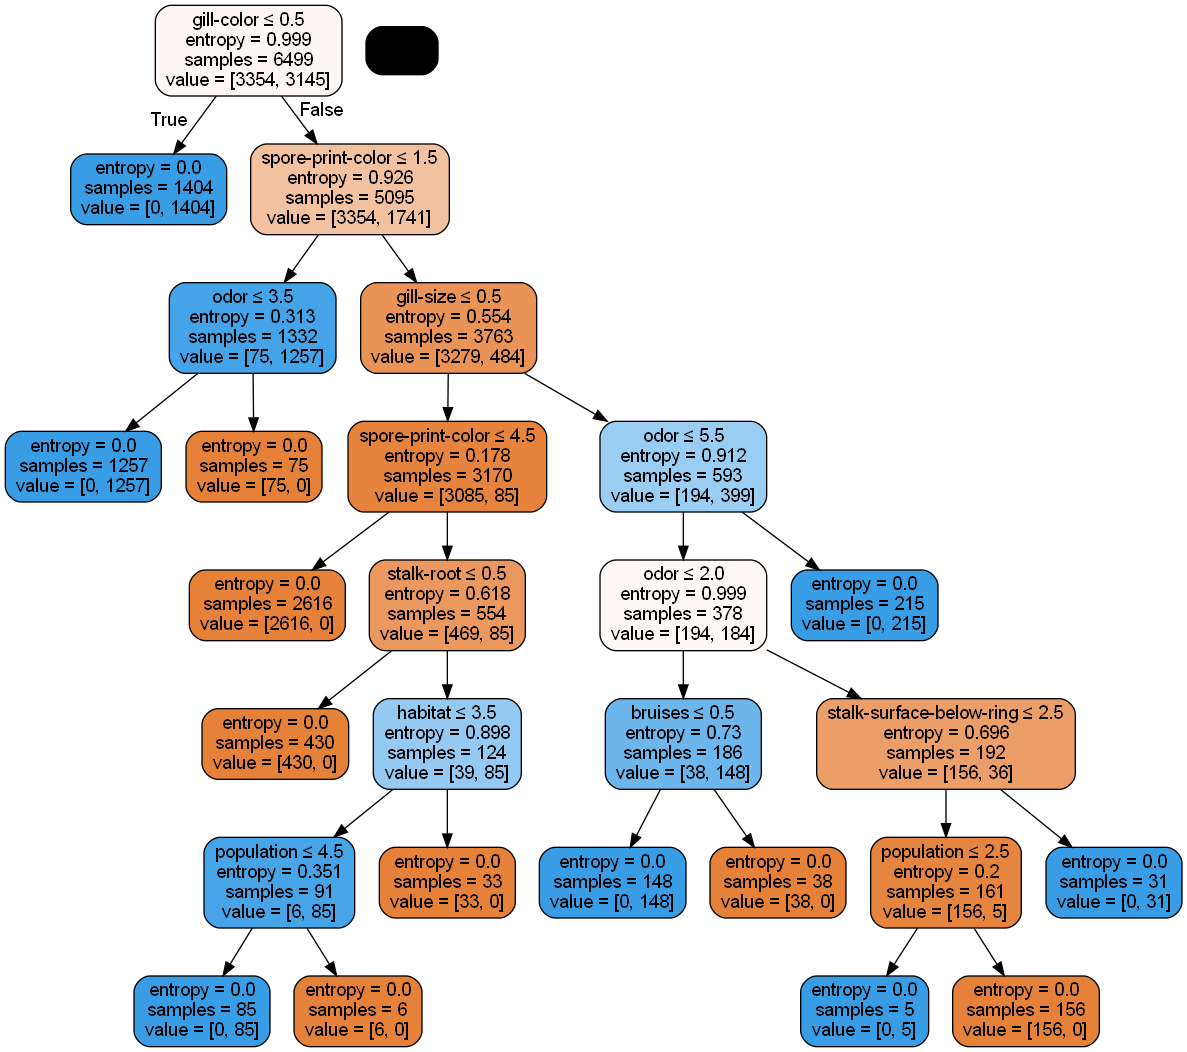

<Figure size 864x864 with 0 Axes>

In [39]:
dot_data = StringIO()
fig = plt.figure(figsize=(12,12))

export_graphviz(dt, out_file= dot_data,
                filled= True,rounded= True, 
                special_characters= True,feature_names= mush_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [40]:
cn = ['0','1']
# or cn = ['1','2']

In [43]:
from sklearn import tree

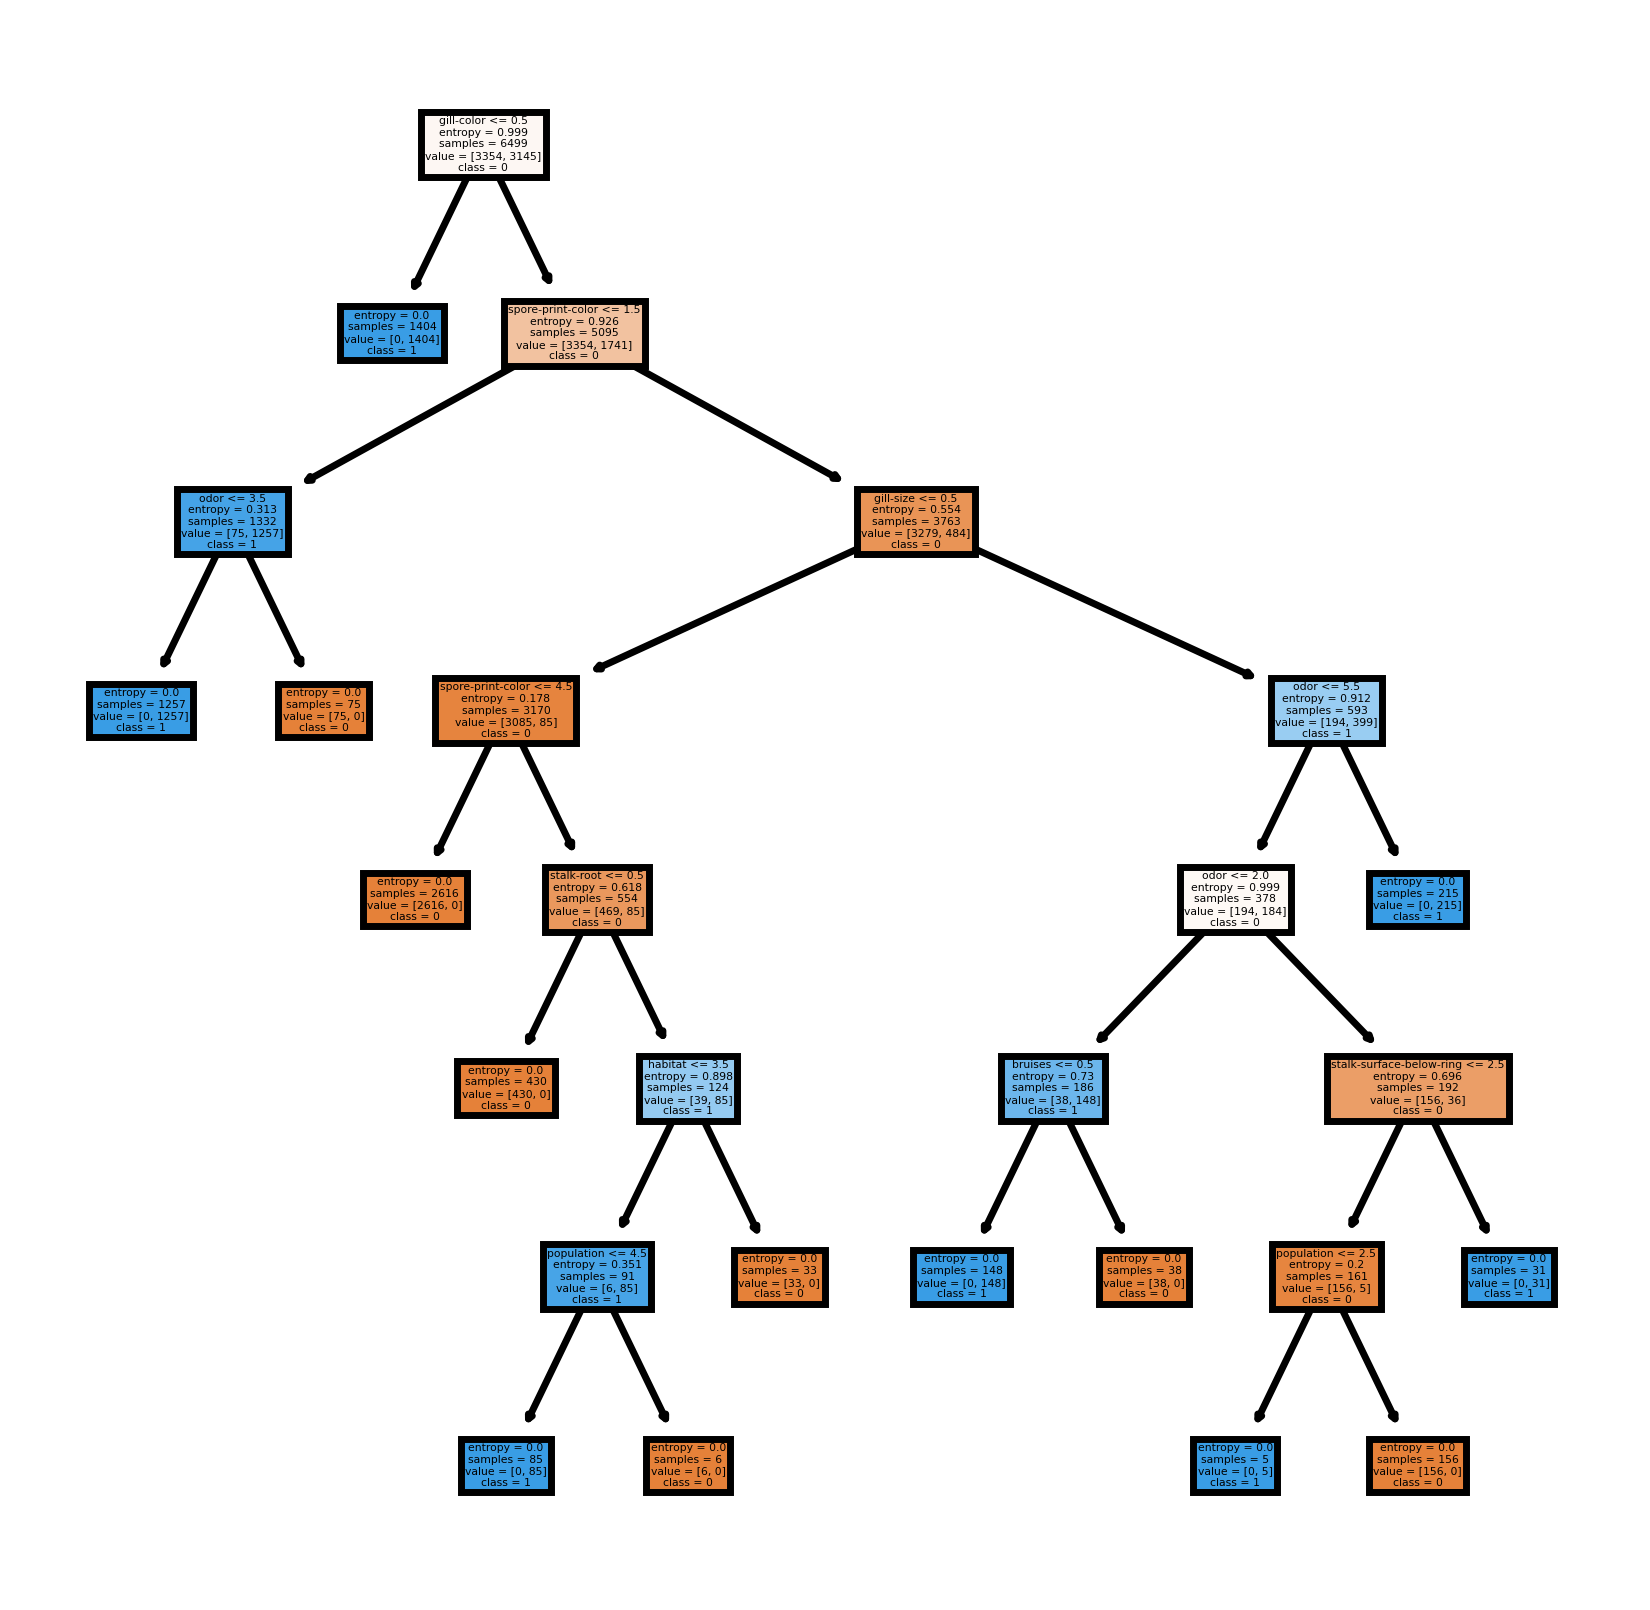

In [44]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize=(4,4), dpi= 500)
# This will enlarge the picture
tree.plot_tree(dt,
               feature_names = mush_train_x.columns, 
               class_names=cn,
               filled = True);
